In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn.decomposition
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
MergedData0 = pd.read_csv('Data.csv', index_col=0);
MergedData1 = MergedData0.iloc[:, :-1]
y = pd.read_csv("pancreatic_training_genes_set.csv", index_col='gene')
y.rename_axis("DepMap_ID")
y = y == 'positive'
data = MergedData1.merge(y, how='inner', left_index=True, right_index=True)
Data = data.iloc[:, :-1]
y = data.iloc[:, -1]
display(Data)
display(y)

,ACH-000001_x,ACH-000004_x,ACH-000005_x,ACH-000007_x,ACH-000009_x,ACH-000011_x,ACH-000012_x,ACH-000013_x,ACH-000014_x,ACH-000015_x,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
ABCA2,0.050772,0.023095,0.022922,0.171503,0.124602,0.017058,0.252853,0.133571,0.012007,0.040111,...,2.124328,4.891905,5.456149,5.100557,3.393691,2.014355,3.930737,2.887525,3.826803,5.330558
ABCA2,0.050772,0.023095,0.022922,0.171503,0.124602,0.017058,0.252853,0.133571,0.012007,0.040111,...,2.124328,4.891905,5.456149,5.100557,3.393691,2.014355,3.930737,2.887525,3.826803,5.330558
ABCD3,0.379680,0.040309,0.016958,0.227634,0.283173,0.028283,0.860338,0.179460,0.034692,0.066385,...,4.363171,4.972233,4.889960,4.938756,4.039138,5.019702,3.693766,5.081936,4.647890,4.939697
ABHD17A,0.685224,0.732916,0.165475,0.597830,0.814729,0.885704,0.323379,0.845485,0.846990,0.632437,...,2.625270,5.062640,5.581351,4.816088,5.025472,4.454834,1.510962,4.021480,4.795455,5.630231
ACRBP,0.033464,0.066090,0.004191,0.021421,0.071012,0.036759,0.009306,0.010147,0.077407,0.060633,...,0.731183,0.526069,0.097611,0.495695,0.124328,1.650765,1.310340,0.310340,1.007196,3.190615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF99,0.112606,0.118855,0.091968,0.066222,0.109089,0.055852,0.039930,0.050354,0.016682,0.193252,...,0.678072,0.000000,0.014355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZPBP,0.008583,0.014735,0.040993,0.004442,0.010830,0.028312,0.031687,0.017363,0.016666,0.004322,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZPBP,0.008583,0.014735,0.040993,0.004442,0.010830,0.028312,0.031687,0.017363,0.016666,0.004322,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZSCAN4,0.042037,0.007619,0.002837,0.002026,0.025120,0.023477,0.020980,0.032201,0.074057,0.005571,...,0.028569,0.028569,0.000000,0.000000,0.014355,0.000000,0.056584,0.014355,0.028569,0.000000


ABCA2      False
ABCA2      False
ABCD3      False
ABHD17A    False
ACRBP      False
           ...  
ZNF99      False
ZPBP       False
ZPBP       False
ZSCAN4     False
ZSCAN4     False
Name: label, Length: 918, dtype: bool

In [3]:
data_gene_dep = Data.iloc[:, 0:1086]
data_gene_dep;
data_gene_eff = Data.iloc[:, 1087:2172]
data_gene_eff;
data_express = Data.iloc[:, 2173:3578]
data_express;

In [4]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X1 = pca.fit_transform(data_gene_dep)
print(pca.explained_variance_ratio_)

[0.8593534  0.0102347  0.00784355 0.00531889 0.00488338 0.00400401
 0.00394112 0.00316466]


In [5]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X2 = pca.fit_transform(data_gene_eff)
print(pca.explained_variance_ratio_)

[0.90216795 0.00636435 0.00572963 0.00387207 0.003019   0.00290743
 0.00247904 0.00217991]


In [6]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X3 = pca.fit_transform(data_express)
print(pca.explained_variance_ratio_)

[0.82387262 0.02704911 0.02293226 0.01007433 0.00610384 0.00463361
 0.00409794 0.00363781]


In [7]:
X4 = np.concatenate((X1, X2, X3), axis=1)
print(X4.shape)

(918, 24)


(402, 24)
(402,)
208


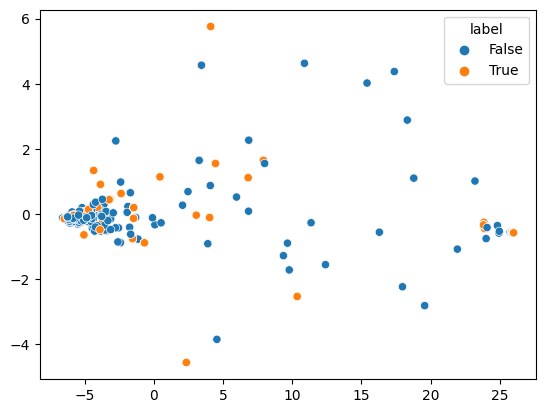

In [8]:
select = np.maximum(y, np.random.rand(len(y)) < sum(y)/(len(y) - sum(y)))
X4 = X4[select]
y = y[select]
print(X4.shape)
print(y.shape)
print(sum(y))
sns.scatterplot(x= X4[:,0], y=X4[:,1], hue=y)
plt.show()

In [9]:
# Get the training and test data
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3)

# Fit the model
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_rt = model.predict_proba(X_test)[:, 1]

accuracy = str(accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rt)
auc_value = str(auc(fpr, tpr))
precision = str(precision_score(y_test, y_pred))
recall = str(recall_score(y_test, y_pred))
f1score = str(f1_score(y_test, y_pred, average="weighted"))

Accuracy:0.7355371900826446
Precision:0.7096774193548387
Recall:0.7586206896551724


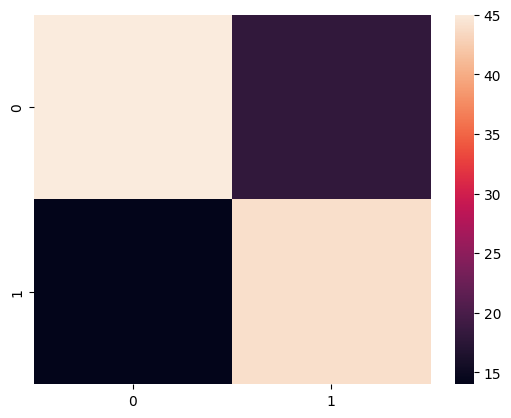

[[45 18]
 [14 44]]


In [10]:
print("Accuracy:" + accuracy)
print("Precision:" + precision)
print("Recall:" + recall)

conf_mx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mx)
plt.show()

print(conf_mx)

In [11]:
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [12]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 150)               3750      
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 dense_2 (Dense)             (None, 8)                 608       
                                                                 
Total params: 15,683
Trainable params: 15,683
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [16]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[expon_lr])

Epoch 1/5
9/9 [==============================] - 2s 73ms/step - loss: 3.1084 - accuracy: 0.3665 - val_loss: 2.4358 - val_accuracy: 0.4215
Epoch 2/5
9/9 [==============================] - 0s 15ms/step - loss: 1.4198 - accuracy: 0.5374 - val_loss: 1.7075 - val_accuracy: 0.4876
Epoch 3/5
9/9 [==============================] - 0s 13ms/step - loss: 1.1946 - accuracy: 0.5516 - val_loss: 1.8076 - val_accuracy: 0.5124
Epoch 4/5
9/9 [==============================] - 0s 12ms/step - loss: 0.9926 - accuracy: 0.6299 - val_loss: 1.3235 - val_accuracy: 0.5207
Epoch 5/5
9/9 [==============================] - 0s 14ms/step - loss: 0.9880 - accuracy: 0.6263 - val_loss: 1.1960 - val_accuracy: 0.6364


Text(0, 0.5, 'Loss')

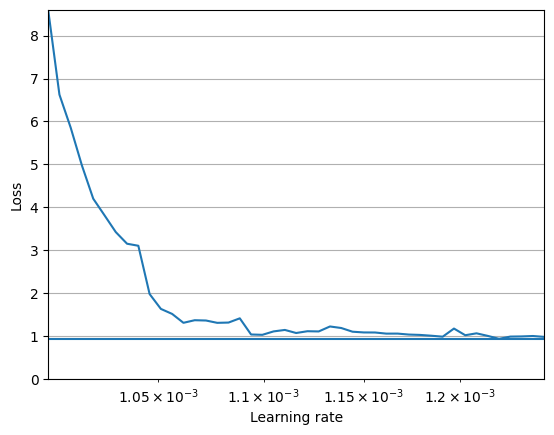

In [17]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [18]:
print("Min Loss: " + str(min(expon_lr.losses)))
print("Best learning rate: " + str(expon_lr.rates[np.argmin(expon_lr.losses)]))
alpha = expon_lr.rates[np.argmin(expon_lr.losses)];

Min Loss: 0.9423995018005371
Best learning rate: 0.0012207943


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [21]:
#Using optimized learning rate: 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=alpha),
              metrics=["accuracy"])

In [22]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "pancreatictypes_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\pancreatictypes_logs\\run_001'

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.0005, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("pancreatictypes_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/200
9/9 [==============================] - 2s 80ms/step - loss: 2.8130 - accuracy: 0.4662 - val_loss: 1.9697 - val_accuracy: 0.4545
Epoch 2/200
9/9 [==============================] - 0s 24ms/step - loss: 1.3029 - accuracy: 0.5480 - val_loss: 1.4979 - val_accuracy: 0.5041
Epoch 3/200
9/9 [==============================] - 0s 14ms/step - loss: 1.2258 - accuracy: 0.5730 - val_loss: 1.5538 - val_accuracy: 0.5041
Epoch 4/200
9/9 [==============================] - 0s 23ms/step - loss: 0.9682 - accuracy: 0.6548 - val_loss: 1.3591 - val_accuracy: 0.5289
Epoch 5/200
9/9 [==============================] - 0s 15ms/step - loss: 1.0724 - accuracy: 0.6299 - val_loss: 1.4201 - val_accuracy: 0.5289
Epoch 6/200
9/9 [==============================] - 0s 12ms/step - loss: 0.9525 - accuracy: 0.6441 - val_loss: 1.7522 - val_accuracy: 0.5124
Epoch 7/200
9/9 [==============================] - 0s 18ms/step - loss: 1.1106 - accuracy: 0.6157 - val_loss: 1.1246 - val_accuracy: 0.5372
Epoch 8/200
9/9 [===

In [24]:
model = keras.models.load_model("pancreatictypes_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_train, y_train)

9/9 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.9217


[0.24330848455429077, 0.9217081665992737]

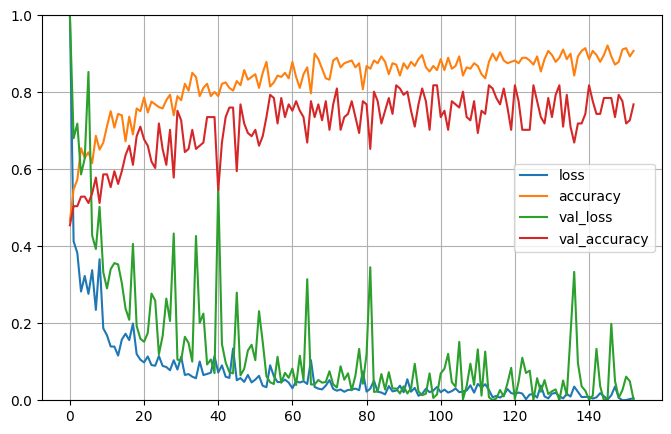

In [25]:
#Plot of Loss, Val_Loss, Accuracy and Val_Accuracy, with loss and val_loss normalized by max and min
hist = pd.DataFrame(history.history)#.plot(figsize=(8, 5))
hist['loss'] = (hist['loss'] - hist['loss'].min()) / (hist['loss'].max() - hist['loss'].min())
hist['val_loss'] = (hist['val_loss'] - hist['val_loss'].min()) / (hist['val_loss'].max() - hist['val_loss'].min())
hist.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()